## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [38]:
#!pip install --upgrade scikit-learn
!pip install mysql-connector-python
!pip install feature-engine
!pip install scikit-learn imbalanced-learn
#!pip install --upgrade imbalanced-learn scikit-learn
#!pip uninstall scikit-learn imbalanced-learn

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/24/02/a5b6271da75cd7f67d9ec834cd79c8d65c1329e1eddfb707c56ded963d3d/mysql_connector_python-8.1.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
      --------------------------------------- 10.2/527.0 kB ? eta -:--:--
     -- ---------------------------------- 30.7/527.0 kB 330.3 kB/s eta 0:00:02
     ------- ---------------------------- 112.6/527.0 kB 819.2 kB/s eta 0:00:01
     ------------------------------- ------ 440.3/527.0 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 527.0/527.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.8 MB 12.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.8/10.8 MB 10.0 MB/s eta 0:00:0

In [21]:
!pip install feature-engine
!pip install seaborn
!pip install xgboost
!pip install catboost
!pip install catboost

  Obtaining dependency information for feature-engine from https://files.pythonhosted.org/packages/a3/1b/13e243aad6fcd559069b059c267db9ef8b843fc0afc443bf18cfcd9228e8/feature_engine-1.6.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.4 MB 544.7 kB/s eta 0:00:18
      --------------------------------------- 0.2/9.4 MB 1.3 MB/s eta 0:00:08
     -- ------------------------------------- 0.6/9.4 MB 3.2 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/9.4 MB 4.0 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.4 MB 4.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/9.4 MB 4.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/9.4 MB 4.0 MB/s eta 0:00:03
     ----- -----------

In [3]:
import pandas as pd                   # Data Manipulation
import numpy as np                    # Numeric Calculation
import seaborn as sns                 # Advance Data Visualization
import matplotlib.pyplot as plt       # Data Visualization
import scipy.stats as stats
import pylab
from sklearn.impute import SimpleImputer        #Imputation
from sklearn.compose import ColumnTransformer   #Column Trasformer
from sklearn.preprocessing import LabelEncoder  # Label Encoder
from sklearn.preprocessing import MinMaxScaler  # MinMax Scalar
import warnings   # Warnings
warnings.filterwarnings('ignore')
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import sklearn.metrics as skmet   # Confusion matrix
from imblearn.over_sampling import SMOTE
from feature_engine.outliers import Winsorizer    # Outlier treatment
#import mysql.connector as sql   # for SQL connection

In [4]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [5]:

df=pd.read_csv('data\LiverT_dataset.csv')


#### Show Top 5 Records

In [6]:
df.head()

,Column1,D Age,D Gender,D BMI,D Cause of Death,D Diabetes,D Hypertension,D Alcohol Abuse,D Smoking,D Lympochyte,...,R Na,R Mg,R WBC,R Platelets,R Cold Ischemia Time,R Warm Ischemia Time,R Blood Transfusion,R Immunosuppressant Medication,R Rejection Episodes,Complications
0,0,40,Female,32.2,Stroke,1,1,1,0,0,...,5.9,1.5,21310,426232,3.9,2.1,0.0,Cyclosporine,3,Infection
1,1,45,Female,32.1,Other,0,0,0,0,1,...,1.8,0.3,19471,414357,3.4,3.0,0.0,Cyclosporine,1,Artery Thrombosis
2,2,21,Male,26.3,Accident,1,1,0,1,1,...,17.1,1.4,9204,292844,7.2,2.8,NaN,Tacrolimus,4,Post-transplant Diabetes
3,3,41,Female,39.3,Other,1,1,1,0,1,...,18.7,1.3,24350,190143,11.0,2.5,0.0,Other,0,Post-transplant Diabetes
4,4,66,Female,38.4,Accident,1,1,1,0,0,...,7.8,1.2,14871,403780,2.7,1.5,1.0,Other,3,Renal Dysfunction


#### Drop unnecessary columns

In [8]:
df1 = df.drop(['Column1'], axis = 1)

#### Handling Duplicates

In [9]:
df1.duplicated().sum()
df2 = df1.drop_duplicates()
df2.duplicated().sum()

0

#### Check for missing/Null values

In [10]:
df2.isnull().sum()

D Age                             0
D Gender                          0
D BMI                             0
D Cause of Death                  0
D Diabetes                        0
D Hypertension                    0
D Alcohol Abuse                   0
D Smoking                         0
D Lympochyte                      0
D Hepatitis B                     1
D Hepatitis C                     0
R Etiology                        1
R MELD Score                      0
R Age                             0
R Gender                          1
R BMI                             1
R Diabetes                        0
R Hypertension                    0
R Alcohol Abuse                   0
R Smoking                         0
R Lympochyte                      1
R Hepatitis B                     0
R Hepatitis C                     0
R Albumin level                   0
R Alcoholic cirrhosis             0
R Primary biliary cirrhosis       0
R Na                              0
R Mg                        

#### Handle missing values

In [11]:
imputer = SimpleImputer(strategy='median')
numerical_cols = df2.select_dtypes(include=np.number).columns
categorical_cols = df2.select_dtypes(exclude=np.number).columns

df2[numerical_cols] = imputer.fit_transform(df2[numerical_cols])

for col in categorical_cols:
    df2[col].fillna(df2[col].mode()[0], inplace=True)

# Check for missing/Null values
df2.isnull().sum()

D Age                             0
D Gender                          0
D BMI                             0
D Cause of Death                  0
D Diabetes                        0
D Hypertension                    0
D Alcohol Abuse                   0
D Smoking                         0
D Lympochyte                      0
D Hepatitis B                     0
D Hepatitis C                     0
R Etiology                        0
R MELD Score                      0
R Age                             0
R Gender                          0
R BMI                             0
R Diabetes                        0
R Hypertension                    0
R Alcohol Abuse                   0
R Smoking                         0
R Lympochyte                      0
R Hepatitis B                     0
R Hepatitis C                     0
R Albumin level                   0
R Alcoholic cirrhosis             0
R Primary biliary cirrhosis       0
R Na                              0
R Mg                        

#### Apply Winsorization to numerical columns

In [12]:
winsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=0.5)
df3 = winsorizer.fit_transform(df2)

#### Preparing X and Y variables

In [13]:
X = df3.drop(columns=['Complications'],axis=1)

In [14]:
X.head()

,D Age,D Gender,D BMI,D Cause of Death,D Diabetes,D Hypertension,D Alcohol Abuse,D Smoking,D Lympochyte,D Hepatitis B,...,R Primary biliary cirrhosis,R Na,R Mg,R WBC,R Platelets,R Cold Ischemia Time,R Warm Ischemia Time,R Blood Transfusion,R Immunosuppressant Medication,R Rejection Episodes
0,40.000000,Female,32.200000,Stroke,0.956261,0.995303,0.714296,0.022140,0.366022,0.74223,...,5.414702,5.900000,1.442840,17246.381173,345056.807840,5.497232,2.40462,0.24229,Cyclosporine,3.000000
1,45.000000,Female,32.100000,Other,0.515360,0.589836,0.215529,0.022140,0.853793,0.24229,...,7.300000,5.161814,0.534663,17246.381173,345056.807840,5.497232,3.00000,0.24229,Cyclosporine,1.653280
2,36.645540,Male,26.300000,Accident,0.956261,0.995303,0.215529,0.445352,0.853793,0.24229,...,5.414702,14.677711,1.400000,10867.600251,292844.000000,7.200000,2.80000,0.24229,Tacrolimus,3.358072
3,41.000000,Female,32.243567,Other,0.956261,0.995303,0.714296,0.022140,0.853793,0.74223,...,5.414702,14.677711,1.300000,17246.381173,258929.946546,8.334038,2.50000,0.24229,Other,1.653280
4,51.725977,Female,32.243567,Accident,0.956261,0.995303,0.714296,0.022140,0.366022,0.24229,...,12.991800,7.800000,1.200000,14871.000000,345056.807840,5.497232,2.40462,0.74223,Other,3.000000


In [15]:
print("Categories in 'D Gender' variable:     ",end=" " )
print(df['D Gender'].unique())

print("Categories in 'D Cause of Death' variable:  ",end=" ")
print(df['D Cause of Death'].unique())

print("Categories in 'R Etiology' variable:",end=" " )
print(df['R Etiology'].unique())

print("Categories in 'R Gender' variable:     ",end=" " )
print(df['R Gender'].unique())

print("Categories in 'R Immunosuppressant Medication' variable:     ",end=" " )
print(df['R Immunosuppressant Medication'].unique())

print("Categories in 'Complications' variable:     ",end=" " )
print(df['Complications'].unique())

Categories in 'D Gender' variable:      ['Female' 'Male']
Categories in 'D Cause of Death' variable:   ['Stroke' 'Other' 'Accident']
Categories in 'R Etiology' variable: ['Other' 'Alcohol' 'Hepatitis' 'NAFLD' nan]
Categories in 'R Gender' variable:      ['Female' 'Male' nan]
Categories in 'R Immunosuppressant Medication' variable:      ['Cyclosporine' 'Tacrolimus' 'Other']
Categories in 'Complications' variable:      ['Infection' 'Artery Thrombosis' 'Post-transplant Diabetes'
 'Renal Dysfunction' 'No Complication' 'Primary Graft Non-function'
 'Portal Vein Thrombosis' 'Biliary Complications'
 'Metabolic Complications' 'Cardiovascular Complications' 'Rejection']


In [16]:
y = df3['Complications']

In [17]:
y

0                        Infection
1                Artery Thrombosis
2         Post-transplant Diabetes
3         Post-transplant Diabetes
4                Renal Dysfunction
                   ...            
1936         Biliary Complications
1937    Primary Graft Non-function
1939                     Infection
1940        Portal Vein Thrombosis
1941                     Infection
Name: Complications, Length: 1938, dtype: object

#### check y is Balanced or Imbalanced

In [18]:
# Target variable categories
# print(df3['Complications'].unique())
print(df3['Complications'].value_counts())

Complications
No Complication                 253
Post-transplant Diabetes        232
Artery Thrombosis               222
Biliary Complications           216
Primary Graft Non-function      187
Infection                       183
Metabolic Complications         180
Renal Dysfunction               174
Portal Vein Thrombosis          126
Rejection                        87
Cardiovascular Complications     78
Name: count, dtype: int64


#### Perform label encoding on y-categorical column

In [19]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

In [20]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X.shape

(1938, 44)

#### Apply Smote to solve Imbalanced problem

In [23]:
smote = SMOTE()
# Perform SMOTE on the scaled numerical features
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [24]:
X_resampled.shape

(2783, 44)

In [25]:
y_resampled.shape

(2783,)

In [26]:
#print(y_resampled.value_counts())
y_resampled

array([ 3,  0,  7, ..., 10, 10, 10])

In [27]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2226, 44), (557, 44))

#### Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.0640
- Mean Absolute Error: 1.7006
- R2 Score: 0.5776
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1410
- Mean Absolute Error: 1.7586
- R2 Score: 0.5255


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.8919
- Mean Absolute Error: 2.5215
- R2 Score: 0.1707
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.8393
- Mean Absolute Error: 2.4782
- R2 Score: 0.1655


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.0467
- Mean Absolute Error: 1.6804
- R2 Score: 0.5846
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1055
- Mean Absolute Error: 1.7290
- R2 Score: 0.5411


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.5467
- Mean Absolute Error: 0.9748
- R2 Score: 0.7628
-----------------------

### Results

In [30]:
result_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)
result_df

,Model Name,R2_Score
5,Random Forest Regressor,0.988622
7,CatBoosting Regressor,0.988236
6,XGBRegressor,0.982795
4,Decision Tree,0.938297
3,K-Neighbors Regressor,0.615790
8,AdaBoost Regressor,0.608002
2,Ridge,0.541062
0,Linear Regression,0.525498
1,Lasso,0.165471


In [31]:
# Print the best model and its R2 score
best_model_name = result_df.iloc[0]['Model Name']
best_r2_score = result_df.iloc[0]['R2_Score']
print("Best Model:", best_model_name)
print("Best R2 Score:", best_r2_score)

Best Model: Random Forest Regressor
Best R2 Score: 0.9886216881126142


## Random Forest Regressor

In [32]:
# Create and fit a Random Forest Regressor model
RAND_model = RandomForestRegressor()
RAND_model.fit(X_train, y_train)

# Predict on the test set
y_pred = RAND_model.predict(X_test)

# Calculate the R2 score (accuracy) of the model
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 98.89


## Plot y_pred and y_test

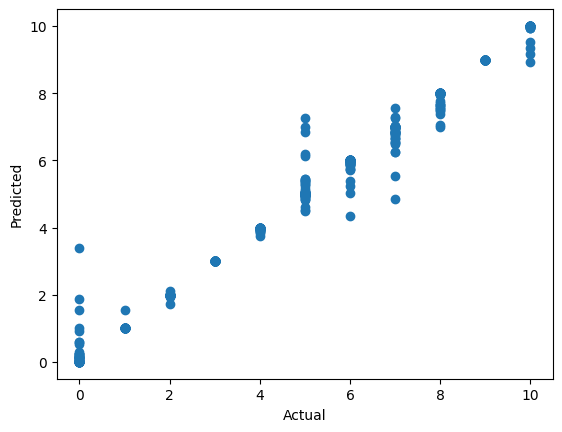

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

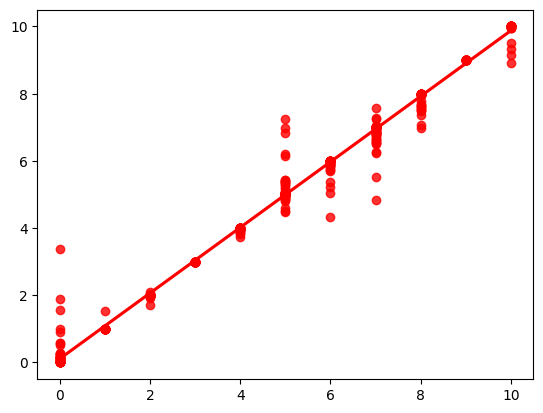

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,7,6.63,0.37
1,9,9.00,0.00
2,6,6.00,0.00
3,3,3.00,0.00
4,3,3.00,0.00
...,...,...,...
552,0,0.00,0.00
553,4,3.96,0.04
554,5,5.00,0.00
555,10,10.00,0.00


### Deploy in Flask

In [36]:

import pickle
# Saving model to disk of random forest
pickle.dump(RAND_model, open('model.pkl','wb'))

model=pickle.load(open('model.pkl', 'rb'))

